### Homework 5

이번 과제에서는 pandas datareader를 이용하여 주가 데이터를 이용해 실습을 한다

#### 1. 데이터 불러오기

아래 라이브러리를 활용하여 2020년 1월 1일부터 2023년 6월 30일까지의 어느 한 주식 종목의 데이터를 불러오라

In [1]:
import pandas_datareader as pdr
import datetime
import yfinance as yf

start = datetime.datetime(2020,1,1)
end = datetime.datetime(2023,6,30)
apple = yf.download('AAPL', start = start, end = end)
apple

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.249039,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.536903,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.114876,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.771019,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.941650,132079200
...,...,...,...,...,...,...
2023-06-23,185.550003,187.559998,185.009995,186.679993,186.428238,53079300
2023-06-26,186.830002,188.050003,185.229996,185.270004,185.020157,48088700
2023-06-27,185.889999,188.389999,185.669998,188.059998,187.806381,50730800


#### 2. AR model

준비된 데이터에 대해 AR모형의 차수를 결정하고 AR model을 적합화(fit)해 보자. 모형을 가장 잘 적합화하기 위해서는 차수를 어떻게 정해야 하는가?

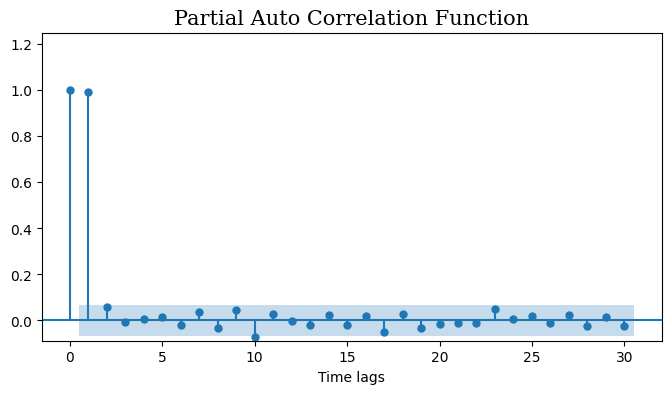

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  879
Model:                 ARIMA(1, 0, 0)   Log Likelihood                2098.585
Date:                Wed, 13 Sep 2023   AIC                          -4191.170
Time:                        09:21:28   BIC                          -4176.834
Sample:                             0   HQIC                         -4185.688
                                - 879                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8227      0.249     19.342      0.000       4.334       5.311
ar.L1          0.9980      0.002    471.839      0.000       0.994       1.002
sigma2         0.0005    1.3e-05     37.641      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                  17.85   Jarque-Bera (JB):               749.51
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(figsize=(8, 4))
plot_pacf(np.log(apple.Close), auto_ylims = True, lags = 30, title = 'PACF of Apple log Index', ax = ax)  # ar 차수는 원시계열에 대해 확인!
plt.xlabel('Time lags', fontsize = 10)
plt.title('Partial Auto Correlation Function', fontsize = 15, fontfamily = 'Serif')
plt.show()

# 결과를 보면 기각역에 존재하는 1이 바로 ar의 차수임을 알 수 있다


##AR(1)
model_ar_1 = sm.tsa.ARIMA(np.log(apple.Close), order = (1,0,0), trend = 'c').fit(method = 'innovations_mle')
model_ar_1.summary()

#### 3. MA model

준비된 데이터에 대해 MA모형의 차수를 결정하고 MA model을 적합화(fit)해 보자. 모형을 가장 잘 적합화하기 위해서는 차수를 어떻게 정해야 하는가? 그리고 MA model을 사용하기 위해서는 어떤 데이터를 사용해야 하는가?

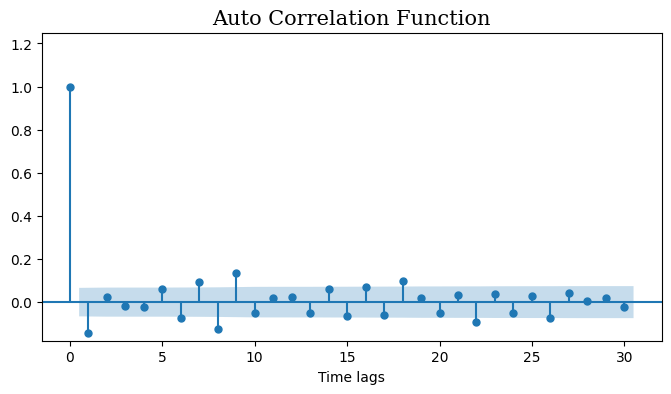

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  879
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 479.877
Date:                Wed, 13 Sep 2023   AIC                           -953.754
Time:                        09:21:29   BIC                           -939.417
Sample:                             0   HQIC                          -948.271
                                - 879                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8701      0.013    365.543      0.000       4.844       4.896
ma.L1          0.9557      0.017     57.557      0.000       0.923       0.988
sigma2         0.0196      0.001     15.819      0.000       0.017       0.022
===================================================================================
Ljung-Box (L1) (Q):                 693.88   Jarque-Bera (JB):               221.41
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                            -1.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [3]:
ret = np.log(apple.Close) - np.log(apple.Close.shift())    # ma는 안정적 시계열을 대상으로 하므로 차분된 데이터를 가지고 파악해야 함
ret = ret.dropna()
fig, ax = plt.subplots(figsize=(8, 4))
plot_acf(ret, auto_ylims = True, lags = 30
         , title = 'ACF of Apple return' , ax = ax)
plt.xlabel('Time lags', fontsize = 10)
plt.title('Auto Correlation Function', fontsize = 15, fontfamily = 'Serif')
plt.show()
# 이 경우 기각역을 벗어나는 1이 ma의 차수임을 알 수 있다

##MA(1)
model_ma_1 = sm.tsa.ARIMA(np.log(apple.Close), order = (0,0,1), trend = 'c').fit(method = 'innovations_mle')
model_ma_1.summary()

#### 4. ARMA model

준비된 데이터에 대해 ARMA모형의 차수(p,q)를 결정하고 ARMA model을 적합화(fit)해 보자. 모형을 가장 잘 적합화하기 위해서는 차수를 어떻게 정해야 하는가? 그리고 ARMA model을 사용하기 위해서는 어떤 데이터를 사용해야 하는가?

In [4]:
warnings.filterwarnings("ignore")
model = sm.tsa.ARIMA(np.log(apple.Close), order = (1,0,1), trend = 'c').fit(method = 'innovations_mle')
print(model.summary())
# ar과 ma의 계수가 모두 의미 있음을 확인할 수 있다.

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  879
Model:                 ARIMA(1, 0, 1)   Log Likelihood                2106.917
Date:                Wed, 13 Sep 2023   AIC                          -4205.834
Time:                        09:21:30   BIC                          -4186.718
Sample:                             0   HQIC                         -4198.523
                                - 879                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8131      0.289     16.674      0.000       4.247       5.379
ar.L1          0.9987      0.002    534.913      0.000       0.995       1.002
ma.L1         -0.1355      0.024     -5.753      0.0

#### 5. Prediction

1~4번을 통해 구한 모형으로부터 20기간 예측을 실행하라. 어떤 결과값이 나오는가? 실제값과 비교하였을 때, 예측은 정확한가? 추정된 값은 효율적인 추정량이고, 최소 예측 분산을 가지고 있는가?

[*********************100%%**********************]  1 of 1 completed


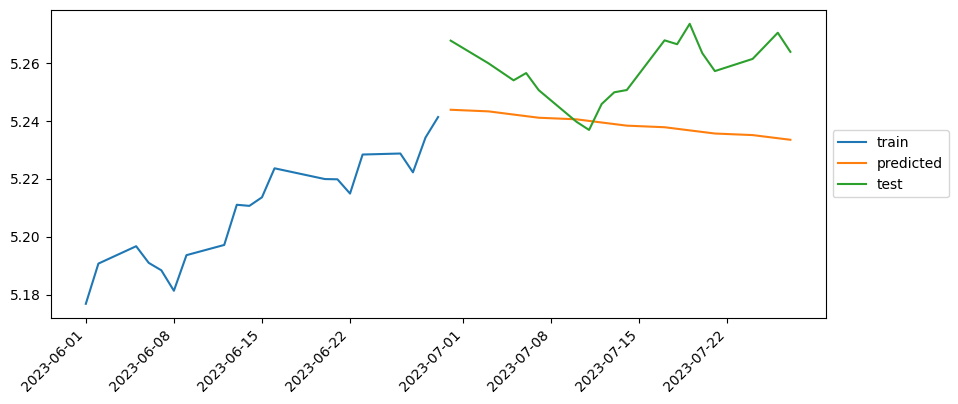

In [5]:
warnings.filterwarnings("ignore")
model = sm.tsa.ARIMA(np.log(apple.Close), order = (1,0,1), trend = 'c').fit(method = 'innovations_mle')

forecast_steps = 20
model.forecast(steps = forecast_steps)

start_date = '2023-06-30'
end_date = '2023-07-28'
apple_new= yf.download('AAPL', start = start_date, end = end_date)

import pandas as pd
plt.figure(figsize = (10,4))
plt.plot(model.fittedvalues[-20:], label = 'train')
plt.plot(pd.date_range(start = '2023-06-30', periods = forecast_steps, freq='B'),
         model.forecast(steps = forecast_steps), label = 'predicted')
plt.plot(np.log(apple_new.Close), label = 'test')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

#### 6. Recurrent Neural Network

<center><img src = "https://images.velog.io/images/yuns_u/post/ccbb28ea-fa08-4d23-804e-419e6f578e4b/image.png" alt="My Image"></center>

**RNN(Recurrent Neural Network)** 은 딥러닝 기법 중 하나로, 시퀀스 데이터를 처리하는 데 특화된 인공신경망 구조이다. 자연어 처리, 음성 인식, 시계열 데이터 등 다양한 시퀀스 데이터에 대한 분석과 예측에 매우 유용하게 사용된다고 알려져 있다. RNN에 관한 자세한 내용은 아래 링크를 통해 익히도록 하자

https://pytorch.org/docs/stable/generated/torch.nn.RNN.html

1개의 hidden layer, $H=1$, activation function은 없고 입력 벡터의 차원 $P=1$인 간단한 경우의 $\mbox{RNN}$을 추가로 고려하자. 추가로 $W_z^{(1)} = \phi_z$, $|\phi_z|<1$, $W_x^{(1)} = \phi_x$, $W_y = 1$, $b_h = 0$, $b_y = \mu$를 가정하자. 그러면 $f_{W^{(1)},b^{(1)}}^{(1)}(\chi_t)$가 자기회귀 계수가 기하급수적으로 감쇠하는, 즉 $\phi_i = \phi_x \phi_z^{i-1}$인 $p$차의 자기회귀 $\mbox{AR}(p)$모델임을 보일 수 있다

$$z_{t-p} = \phi_x x_{t-p}$$
$$z_{t-T+2} = \phi_z z_{t-T+1} + \phi_x x_{x-T+2}$$
$$\cdots = \cdots$$
$$z_{t-1} = \phi_z z_{t-2} + \phi_x x_{t-1}$$
$$\hat x_t = z_{t-1} + \mu$$

위 조건에서 다음이 성립한다

$$\hat x_t = \mu + \phi_x(L + \phi_z L^2 + \cdots + \phi_z^{p-1} L^p)[x_t] = \mu + \sum_{i=1} \phi_i x_{t-i}$$

위 조건을 참고하여, 아래 라이브러리를 사용하여 Activation function을 사용하지 않고 은닉층이 한 개인 간단한 RNN모형을 사용하여 2번의 과정을 다시 반복하라.

In [6]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

min_val = np.min(apple.Close)
max_val=np.max(apple.Close)

scaled_data= (apple.Close-min_val)/(max_val-min_val)
X=scaled_data[1:]
y=scaled_data.shift(1).dropna()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, shuffle=False)

model=Sequential()
model.add(SimpleRNN(units=1

                    activation='Sigmoid'
                    )
)